In [171]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

### Random Variable Generation from Statistical Distributions

### [With numpy.random](https://numpy.org/doc/1.16/reference/routines.random.html#distributions)

To generate random data, we don't have to look far; the numpy.random module has random generation functions drawn from dozens of standard statistical distributions.

These distributions take two kinds of parameters:
  - **Model Parameters**: The parameters that determine the values that are generated.
    - Every statistical distribution has its own number and names of parameters, which should be referenced before using the function.  
    - To make it easier to interpret the parameters, Numpy uses the parameter names used by the [**Statistical Distribution Section of the Engineering Statistics Handbook**](https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm) (e.g. "location", "scale", and "shape" parameters)  
  - **Generation Parameters**: The parameters that determine the amount of data that is generated.
    - In Numpy, this is usually **"size"**.  `size=100` means "Generate an array of 100 numbers."
  
  
#### Some of the Distributions We'll Use Today

| Function | Distribution |  Example   | Handbook Link |
| :------- | :----------- |  :-------- | :------------ |
| [`normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) | Normal Distribution | `normal(loc=1, scale=2, size=100)` | [![](https://www.itl.nist.gov/div898/handbook/eda/section3/gif100/norpdf.jpg)](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3661.htm) |
| `lognormal()` | Log-Normal Distribution | `lognormal(loc=1, scale=2, size=100)` | [![](https://www.itl.nist.gov/div898/handbook/eda/section3/gif100/lgnpdf.gif)](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3669.htm)  |
| `uniform()` | Uniform Distribution | `uniform(low=2, high=5, size=100)` | [![](https://www.itl.nist.gov/div898/handbook/eda/section3/gif100/unipdf.jpg)](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3662.htm) |
| `chisquare()` | Chi-Square Distribution | `chisquare(df=5, size=100)` | [![](https://www.itl.nist.gov/div898/handbook/eda/section3/gif100/chspdf.jpg)](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3666.htm) |
| ``


**Exercises**

Generate arrays of random data with the requested parameters, and plot their histograms. Please generate enough data and use enough histogram bins so that the distribution's shape can be clearly seen.

Example: Plot a uniform distribution of values between two and five.

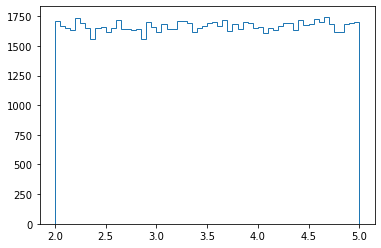

In [172]:
x = np.random.uniform(low=2, high=5, size=100000)
plt.hist(x, bins=60, histtype='step');

Plot a uniform distribution of values between -4 and 4.

Plot a normal distribution of values with a mean of 0 and a standard deviation of 1.

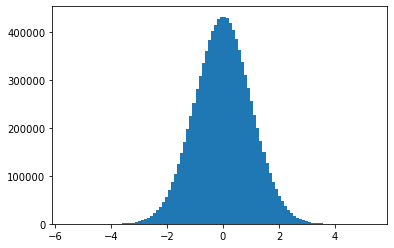

In [176]:
x = np.random.normal(0, 1, size=10000000)
plt.hist(x, bins=100);

Plot a normal distribution of values with a mean of 100 and a standard deviation of 1.
(Note: referencing the function docs and the engineering handbook helps translate which parameters correspond to which)

Plot a normal distribution of values with a mean of 100 and a standard deviation of 1.

Plot a normal distribution of values with a mean of 1 and a standard deviation of 100.

Plot four normal distributions, all with means of 0, but with standard deviations of 1, 2, 3, and 4, respectively.

Plot four normal distributions, all with stds of 1, but with means of of 1, 2, 3, and 4, respectively.

Plot a lognormal distribution with a location of 2 and scale of 3.

Plot 3 chi-square distributions , with degrees of freedom of 1, 3, and 7

The lognormal distribution is defined as having a natural log that is normally-distributed.  Let's check that!
  - Plot the natural log of a lognormal distribution with a mean of 2 and std of 3.
  - On the same plot, plot a normal distribution with the same parameters.  Do they look similar?
  

Let's pretend that numpy announced they were deleting the lognormal function (oh, no!).  How could we calculate our own lognormal distribution of data?

Generate an array of normal data, then use math to transform it to a lognormal distribution.  Plot it against the `lognormal()` function with the same parameters to confirm it's the same (or at least, very similar).

*Tip*: $ e ^ x $ (called the exponential) is the opposite of the natural log


The Chi-square distribution is generated by summing up multiple normal distributions.

$$ \sum_{i=1}^{df}{X_i^2}  $$

Let's check that numpy's `chisquare()` function is doing this!  Reproduce a chi-square distribution with 3 degrees of freedom (i.e. "df") by summing up three normal distributions.  Compare your results with against the distribution generated by `chisquare()`, and show that they are the same.

### Getting More Out of Your Distributions with `scipy.stats`

Scipy Stats is an even bigger library and is put to a higher level of quality when comes to statistical accuaracy; as a result, it will let us get a finer level of control over the data we generate.

Let's take a look a the continuous distributions that scipy stats can generate, using thier `rvs()` (i.e. "Random Variate Sample") function to generate random data the same way that we did with numpy.


| Numpy Function | Scipy Stats Function |  Example   | Handbook Link |
| :------- | :----------- |  :-------- | :------------ |
| [`normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) | `norm.rvs()` | `norm.rvs(loc=1, scale=2, size=100)` | [![](https://www.itl.nist.gov/div898/handbook/eda/section3/gif100/norpdf.jpg)](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3661.htm) |
| `lognormal()` | `lognormal.rvs()` | `lognormal(loc=1, scale=2, size=100)` | [![](https://www.itl.nist.gov/div898/handbook/eda/section3/gif100/lgnpdf.gif)](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3669.htm)  |
| `uniform()` | `uniform.rvs()` | `uniform.rvs(loc=2, scale=5, size=100)` | [![](https://www.itl.nist.gov/div898/handbook/eda/section3/gif100/unipdf.jpg)](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3662.htm) |
| `chisquare()` | `chi2.rvs()` | `chi2.rvs(df=5, size=100)` | [![](https://www.itl.nist.gov/div898/handbook/eda/section3/gif100/chspdf.jpg)](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3666.htm) |
| ``

*Note*: Not all of these distributions work the same as their Numpy counterparts; often, they name the parameters a little differently or may even have more parameters.  

*Tip*: To see the parameters that will be needed, check the help on the distribution name, not on the rvs function (e.g. `stats.norm?`)

**Exercises**

Make histograms of the following distributions using the `scipy.stats` functions.

Example: Plot a uniform distribution that ranges between 2 and 4.

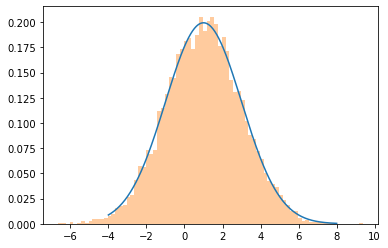

In [220]:
model = stats.norm(1, 2)

data = model.rvs(10000)
model.mean(), model.std()
x = np.linspace(-4, 8, 500)
plt.plot(x, model.pdf(x))
plt.hist(data, alpha=0.4, density=True, bins=80);

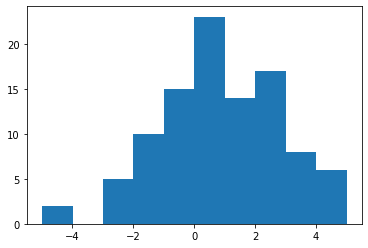

In [180]:
data = stats.norm.rvs(1, 2, size=100)
plt.hist(data);

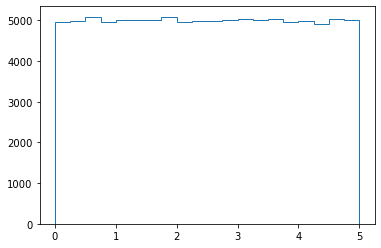

In [94]:
x = stats.uniform.rvs(loc=0, scale=5, size=100000);
plt.hist(x, bins=20, histtype='step');

Plot a uniform distribution that ranges from 1 to 5000.

Plot a normal distribution with a mean of 1 and a standard deviation of 5

Plot 3 normal distributions, all with means of .2 and stds of 1, 1.5, and 2.

Plot normal distributions from numpy.random and scipy.stats, each with means of 3 and stds of 2.  Show they are the same.

Plot chi-square distributions from numpy.random and scipy.stats, each with dfs 5.  Show they are the same.

### Scipy Stats Distribution Objects: Seperating Model Description from Sampling

Scipy has a very useful Object-Oriented interface that matches most of the statistics and machine learning libraries out there; instead of just doing everything in one function, it breaks it up into smaller steps.

  1. Construct a Model (in this case, a theoretical statistical distribution) you want to use, with the model parameters you want to apply to it.
  
    1. For example: `model = stats.normal(loc=1, scale=3)`
    
  1. Use the model for your purposes.
  
    1. For example: to generate random samples from it: `model.rvs(size=100)`
    
    1. For example: to generate a theoretical probability density: `model.pdf(np.linspace(-3, 3, 100))`

  As we get closer towards machine learning, we'll break down these steps into smaller and smaller pieces.  

| Method | Purpose | Example |
| :----- | :------ | :------ |
| `model = dist(params)` | Set the Model Parameters | `model = norm(1, 0)` |
| `model.rvs(size=)` | Generate random samples from a model | `norm(1, 0).rvs(size=100)` |
| `model.pdf(x=)` | Calculate the probability density at point "x" from a model | `norm(1, 0).pdf(0)` |
| `model.cdf(x=)` | Calculate the cumulative probability density at point "x" from a model | `norm(1, 0).pdf(0)` 


Because every distribution shares common methods, it's pretty straightforward to make calculations from wildly-different distributions!  Let's try it out here.

**Exercises**

Example: What is the probability density for a normal distribution with mean of 0 and sd of 1 at x=1?

In [97]:
model = stats.norm(0, 1)
x = 1
model.pdf(x)

0.24197072451914337

Example: What is the probability density for a normal distribution with mean of 0 and sd of 1 at all the values of x between -4 and 4? Plot it.

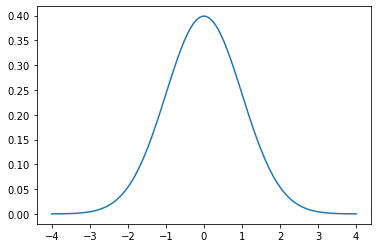

In [99]:
model = stats.norm(0, 1)
x = np.linspace(-4, 4, 100)
plt.plot(x, model.pdf(x));

What is the probability density for a normal distribution with mean of -1 and sd of 2 at all the values of x between -4 and 4? Plot it.

What is the probability density for a uniform distribution between -3 and 5 at all the values of x between -10 and 10? Plot it.

Generate 20 random points from a normal distribution with mean of 1 and and sd of 10, and plot the sample's distribution.  Also plot the theoretical probability distribution in the same plot, to compare.

Generate 20 random points from a uniform distribution with mean of 1 and and sd of 10, and plot the sample's distribution.  Also plot the theoretical probability distribution in the same plot, to compare.

Plot the theoretical probability distributions for chi-square data with dfs of 1 to 6.

Below is random, normally-distributed data generated with mystery parameters.  Guess the values that generated them and plot the pdf of your guess over the random data.  Guess until you are satisfied you are close to the correct answer.

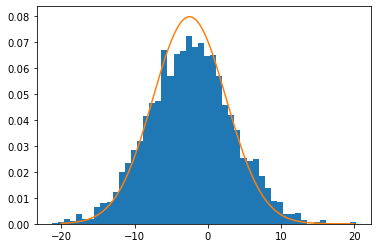

In [241]:
# Nick's code:
np.random.seed(42)  # ensures that everyone has the same "random" values.
data = np.random.normal(np.random.uniform(-10, 10), np.random.uniform(2, 6), size=3000);  # the mystery data (leave untouched)

model = stats.norm(-2.5, 5)
x = np.linspace(-20, 20, 200)
y = model.pdf(x)

# Your Code:
plt.hist(data, bins=50, density=True);
plt.plot(x, y);

Let's try again, this time with less data.

In [110]:
# Nick's code:
np.random.seed(17)  # ensures that everyone has the same "random" values.
data = np.random.normal(np.random.uniform(-10, 10), np.random.uniform(2, 6), size=30);  # the mystery data (leave untouched)

# Your Code:
data

array([ -1.53476306,   0.61467064,   0.16895909,   3.67068043,
        -4.56715906,  -5.59940732,  -3.49380982,  -5.91139402,
         4.84397487,   0.64352278, -11.60447558,  -4.67578724,
        -1.88129372, -11.4250296 ,   1.31367743,  -6.05841709,
        -8.60925063,  -5.13739983,  -8.15605794,   0.14454913,
        -2.08125162,  -5.94793225,  -7.43079603,  -3.56556869,
        -9.10529403,  -3.44716213,  -7.21999138,  -2.66430724,
        -0.07693356,  -4.67799644])

Let's try again, this time with a random model, and random parameters for that model!  Which distribution best-fits the data?

In [134]:
# Nick's code:
import random
random.seed(32)
np.random.seed(32)  # ensures that everyone has the same "random" values.
data = random.choice([
    np.random.normal(np.random.uniform(-10, 10), np.random.uniform(2, 6), size=300),
    np.random.uniform(np.random.uniform(-10, 10), np.random.uniform(2, 6), size=300),
    np.random.lognormal(np.random.uniform(-10, 10), np.random.uniform(2, 6), size=300),
]) # the mystery data (leave untouched)

# Your Code:
data[:15]

array([ 9.20569668,  7.42313741,  9.89203111,  9.2093129 , 12.31557739,
       12.98369182,  6.2660566 ,  4.7737216 ,  4.75191621, 13.95150214,
       13.48020925,  8.7707061 ,  5.17120583,  7.57637174, 12.46146063])

Let's do it one last time, this time with less data.  Which distribution best-fits the data? 

In [146]:
# Nick's code:
import random
random.seed(108)
np.random.seed(104)  # ensures that everyone has the same "random" values.
data = random.choice([
    np.random.normal(np.random.uniform(-10, 10), np.random.uniform(2, 6), size=30),
    np.random.uniform(np.random.uniform(-10, 10), np.random.uniform(2, 6), size=30),
    np.random.lognormal(np.random.uniform(-10, 10), np.random.uniform(2, 6), size=30),
]) # the mystery data (leave untouched)

# Your Code:
data

array([ -8.81254663,  -4.33940651,  -5.40317241,  -8.93380444,
        -0.71291746,  -7.63401755,  -7.96444238,  -6.8468883 ,
        -4.13921974,  -8.59614782, -11.50856166,  -8.03731876,
        -4.96716835,  -7.43624374,  -5.5676058 ,  -8.93177926,
        -5.99919557,  -9.3676877 ,  -4.09948053,  -3.28924444,
       -11.75049834,  -8.45789466,  -8.92584566,  -8.93454705,
        -9.85507659,  -6.87761157,  -3.45228414,  -2.31798142,
        -7.49956347,  -6.15594918])

### Fitting Models from Data Automatically

Guessing the parameters for a model can be done by the distribution objects directly!  You still have to choose the model yourself, but by calling a `.fit()` method, you'll get a pretty good guess that you can use to construct a new distribution model with.

| Method | Purpose | Example |
| :----- | :------ | :------ |
| `params = dist.fit(x=)`  | Generate model parameters from samples of data | `normal.fit([.2, .5, 0])`
| `model = dist(*params)`  | Supply parameters to the model constructor | `params=(1, 2);  model=normal(*params)`

**Exercises**

Example: Fit the data provided with a normal distribution.  What guess for model parameters does scipy stats think best-fits this data?

In [299]:
np.random.seed(11)
data = stats.lognorm(1, 3).rvs(200)
data[:5]

array([8.75146578, 3.75120778, 3.615965  , 3.07041714, 3.99174959])

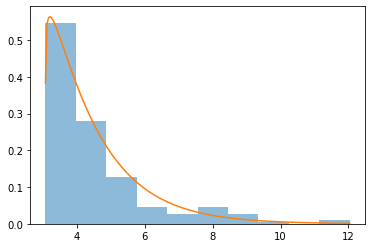

In [306]:
model = stats.chi2
params = model.fit(data)
fitted_model = model(*params)
fitted_model2 = model(np.mean(data), np.std(data))

plt.hist(data, density=True, alpha=.5);
x = np.linspace(data.min(), data.max(), 200)
plt.plot(x, fitted_model.pdf(x));
# plt.plot(x, fitted_model2.pdf(x));

In [290]:
fitted_model.pdf(x) == fitted_model2.pdf(x)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Example: Plot the pdf of the fitted normal model against the original data.  Does it look like a good fit?

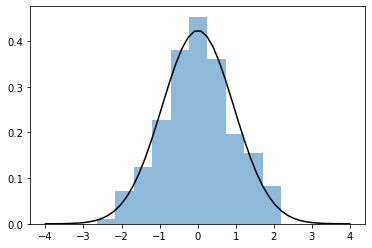

In [161]:
# Nick's Code:
np.random.seed(11)
data = stats.norm(0, 1).rvs(200)

# Your Code:
guess = stats.norm.fit(data)
model = stats.norm(*guess) # same as stats.norm(guess[0], guess[1])
x = np.linspace(-4, 4)
plt.hist(data, density=True, alpha=0.5);
plt.plot(x, model.pdf(x), c='k');

Plot the pdf of the fitted normal model against the original data.  Does it look like a good fit?

In [163]:
# Nick's Code:
np.random.seed(12)
data = stats.norm(2, 5).rvs(200)

# Your Code:


Plot the pdf of the fitted uniform model against the original data.  Does it look like a good fit?

In [164]:
# Nick's Code:
np.random.seed(13)
data = stats.uniform(0, 11).rvs(200)

# Your Code:


Plot the pdf of the fitted lognorm model against the original data.  Does it look like a good fit?

In [166]:
# Nick's Code:
np.random.seed(14)
data = stats.lognorm(2, 0, 11).rvs(200)

# Your Code:


Plot the pdf of all three fitted models (normal, uniform, and lognorm) against the original data. Which looks like a better fit?

In [168]:
# Nick's code:
import random
random.seed(108)
np.random.seed(104)  # ensures that everyone has the same "random" values.
data = random.choice([
    np.random.normal(np.random.uniform(-10, 10), np.random.uniform(2, 6), size=300),
    np.random.uniform(np.random.uniform(-10, 10), np.random.uniform(2, 6), size=300),
    np.random.lognormal(np.random.uniform(-10, 10), np.random.uniform(2, 6), size=300),
]) # the mystery data (leave untouched)

# Your Code:
data[:15]

array([ -8.81254663,  -4.33940651,  -5.40317241,  -8.93380444,
        -0.71291746,  -7.63401755,  -7.96444238,  -6.8468883 ,
        -4.13921974,  -8.59614782, -11.50856166,  -8.03731876,
        -4.96716835,  -7.43624374,  -5.5676058 ])

Plot the pdf of all three fitted models (normal, uniform, and lognorm) against the original data. Which looks like a better fit?

In [170]:
# Nick's code:
import random
random.seed(108)
np.random.seed(104)  # ensures that everyone has the same "random" values.
data = random.choice([
    np.random.normal(np.random.uniform(-10, 10), np.random.uniform(2, 6), size=30),
    np.random.uniform(np.random.uniform(-10, 10), np.random.uniform(2, 6), size=30),
    np.random.lognormal(np.random.uniform(-10, 10), np.random.uniform(2, 6), size=30),
]) # the mystery data (leave untouched)

# Your Code:
data[:15]

array([ -8.81254663,  -4.33940651,  -5.40317241,  -8.93380444,
        -0.71291746,  -7.63401755,  -7.96444238,  -6.8468883 ,
        -4.13921974,  -8.59614782, -11.50856166,  -8.03731876,
        -4.96716835,  -7.43624374,  -5.5676058 ])